In [61]:
import os
import warnings

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier  # Source https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor  # Source: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC, LinearSVC  # Source: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [62]:
# Configure.
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [63]:
# Ingestion.
# inputPath to the CSV file.
inputPath = os.path.join(os.path.expanduser("~"), "development", "dgef-data-science",
                         "exercises", "module3_part_1",
                         "data", "evaluacion-modulo-3-clasificacion.csv")

# Prints the absolute inputPath to the CSV file.
print("The input CSV file is: ", inputPath)

# Reads the CSV data file.
sourceMatrix = pd.read_csv(inputPath, dtype='str', encoding="ISO-8859-1")
sourceMatrix[["Y", "X1", "X2"]] = sourceMatrix[["Y", "X1", "X2"]].astype(float)
print(sourceMatrix.head())

The input CSV file is:  /home/lneumann/development/dgef-data-science/exercises/module3_part_1/data/evaluacion-modulo-3-clasificacion.csv
     Y        X1        X2
0  0.0  0.455427  0.141295
1  1.0  0.616538  0.716436
2  0.0  0.909646  0.142389
3  0.0  0.564656  0.078458
4  0.0  0.193780  0.333579


In [64]:
# Mean square error function.
def meanSquareErrorFunction(v1, v2):
    accumulator, columns = 0, len(v1)

    for i in range(columns):
        accumulator = accumulator + (v1[1] - v2[1]) ** 2
    return (accumulator ** 0.5) / columns

In [65]:
# Data sample.
# 80% training data and 20% testing data.
test_sample_size = 0.2
X_split_training_set, X_split_testing_set, Y_split_training_set, Y_split_testing_set = train_test_split(
    sourceMatrix[["X1", "X2"]],
    sourceMatrix[["Y"]],
    test_size=test_sample_size,
    random_state=1)

In [66]:
# Transforming data as a Numpy array.
X_training_set = np.asarray(X_split_training_set[["X1", "X2"]].copy(deep=True).reset_index(drop=True))
X_testing_set = np.asarray(X_split_testing_set[["X1", "X2"]].copy(deep=True).reset_index(drop=True))
Y_training_set = np.asarray(Y_split_training_set[["Y"]].copy(deep=True).reset_index(drop=True))
Y_testing_set = np.asarray(Y_split_testing_set[["Y"]].copy(deep=True).reset_index(drop=True))

----------------------------- Logistic Regression -----------------------------
Logistic Regression mean square error =  [0.]
Logistic Regression Accuracy score:
0.92
Logistic Regression Precision score:
0.7142857142857143
Logistic Regression confusion matrix:
[[72  0]
 [ 8 20]]


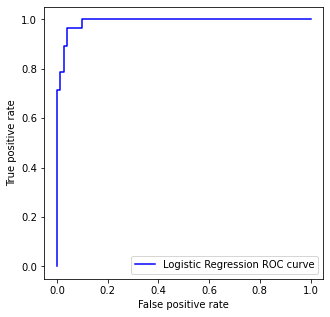

Logistic Regression area under the ROC curve is 0.9895833333333334


In [67]:
from sklearn.metrics import precision_score

# Calculation using python scikit-learn defined functions.
# scikit-learn method comparison.

# ---------------------------------- Logistic Regression ----------------------------------
print("----------------------------- Logistic Regression -----------------------------")
# Logistic Regression.
logisticRegression = LogisticRegression()
logisticRegression.fit(X_training_set, Y_training_set)
Y_LogisticRegression_predicted_set = logisticRegression.predict(X_testing_set)
logisticRegressionMeanSquareError = meanSquareErrorFunction(Y_LogisticRegression_predicted_set, Y_testing_set)
print("Logistic Regression mean square error = ", logisticRegressionMeanSquareError)

# Logistic Regression Accuracy score.
logisticRegressionAccuracyScore = accuracy_score(pd.DataFrame(Y_LogisticRegression_predicted_set), Y_testing_set)
print("Logistic Regression Accuracy score:")
print(logisticRegressionAccuracyScore)

logisticRegressionPrecisionScore = precision_score(pd.DataFrame(Y_LogisticRegression_predicted_set), Y_testing_set)
print("Logistic Regression Precision score:")
print(logisticRegressionPrecisionScore)

# Logistic Regression confusion matrix.
print("Logistic Regression confusion matrix:")
print(confusion_matrix(Y_testing_set, Y_LogisticRegression_predicted_set))

# Logistic Regression ROC curve compute.
Y_LogisticRegression_predicted_set_prob = logisticRegression.predict_proba(X_testing_set)[:, 1]
X_LogisticRegression_rate, Y_LogisticRegression_rate, _ = roc_curve(Y_testing_set,
                                                                    Y_LogisticRegression_predicted_set_prob)
fig = plt.figure(figsize=(5., 5.))
ax = fig.add_subplot(1, 1, 1)
plt.plot(X_LogisticRegression_rate, Y_LogisticRegression_rate, color="blue", linestyle="-",
         label="Logistic Regression ROC curve")
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='best', ncol=2)
plt.show()

# Logistic Regression area under the ROC curve.
print("Logistic Regression area under the ROC curve is",
      roc_auc_score(Y_testing_set, Y_LogisticRegression_predicted_set_prob))
# ------------------------------------------------------------------------------------------------------

----------------------------- Support Vector Machines -----------------------------
------- Linear SVC -------
Linear SVC mean square error =  [0.]
Linear SVC Accuracy score:
0.91
Linear SVC Precision score:
0.7142857142857143
Linear SVC confusion matrix:
[[71  1]
 [ 8 20]]


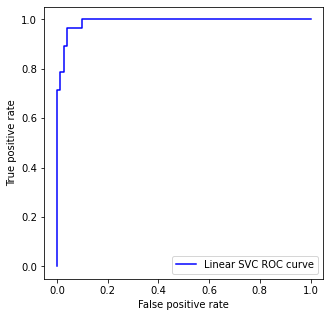

Linear SVC area under the ROC curve is 0.9895833333333334


In [68]:
# ---------------------------------- Support Vector Machines ----------------------------------
print("----------------------------- Support Vector Machines -----------------------------")
# Support Vector Machines.
# Linear SVC
print("------- Linear SVC -------")
linearSVC = LinearSVC(C=0.1, max_iter=500, fit_intercept=True)
linearSVC.fit(X_training_set, Y_training_set)
Y_LinearSVC_predicted_set = linearSVC.predict(X_testing_set)
linearSVCMeanSquareError = meanSquareErrorFunction(Y_LinearSVC_predicted_set, Y_testing_set)
print("Linear SVC mean square error = ", linearSVCMeanSquareError)

# Linear SVC Accuracy score.
linearSVCAccuracyScore = accuracy_score(pd.DataFrame(Y_LinearSVC_predicted_set), Y_testing_set)
print("Linear SVC Accuracy score:")
print(linearSVCAccuracyScore)

linearSVCPrecisionScore = precision_score(pd.DataFrame(Y_LinearSVC_predicted_set), Y_testing_set)
print("Linear SVC Precision score:")
print(linearSVCPrecisionScore)

# Linear SVC confusion matrix.
print("Linear SVC confusion matrix:")
print(confusion_matrix(Y_testing_set, Y_LinearSVC_predicted_set))

# Linear SVC ROC curve compute.
Y_LinearSVC_predicted_set_prob = linearSVC._predict_proba_lr(X_testing_set)[:, 1]
X_LinearSVC_rate, Y_LinearSVC_rate, _ = roc_curve(Y_testing_set,
                                                  Y_LinearSVC_predicted_set_prob)
fig = plt.figure(figsize=(5., 5.))
ax = fig.add_subplot(1, 1, 1)
plt.plot(X_LinearSVC_rate, Y_LinearSVC_rate, color="blue", linestyle="-",
         label="Linear SVC ROC curve")
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='best', ncol=2)
plt.show()

# Linear SVC area under the ROC curve.
print("Linear SVC area under the ROC curve is",
      roc_auc_score(Y_testing_set, Y_LinearSVC_predicted_set_prob))

------- SVC Linear -------
SVC linear mean square error =  [0.]
SVC linear Accuracy score:
0.89
SVC linear Precision score:
0.6071428571428571
SVC linear confusion matrix:
[[72  0]
 [11 17]]


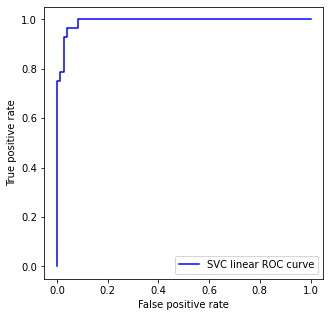

SVC linear area under the ROC curve is 0.9910714285714285


In [69]:
# SVC
print("------- SVC Linear -------")
svcLinear = SVC(kernel='linear', C=0.1, max_iter=500, probability=True)
svcLinear.fit(X_training_set, Y_training_set)
Y_SVCLinear_predicted_set = svcLinear.predict(X_testing_set)
svcLinearMeanSquareError = meanSquareErrorFunction(Y_SVCLinear_predicted_set, Y_testing_set)
print("SVC linear mean square error = ", svcLinearMeanSquareError)

# SVC linear Accuracy score.
svcLinearAccuracyScore = accuracy_score(pd.DataFrame(Y_SVCLinear_predicted_set), Y_testing_set)
print("SVC linear Accuracy score:")
print(svcLinearAccuracyScore)

# SVC linear Precision score.
svcLinearPrecisionScore = precision_score(pd.DataFrame(Y_SVCLinear_predicted_set), Y_testing_set)
print("SVC linear Precision score:")
print(svcLinearPrecisionScore)

# SVC linear confusion matrix.
print("SVC linear confusion matrix:")
print(confusion_matrix(Y_testing_set, Y_SVCLinear_predicted_set))

# SVC linear ROC curve compute.
Y_SVCLinear_predicted_set_prob = svcLinear.predict_proba(X_testing_set)[:, 1]
X_SVCLinear_rate, Y_SVCLinear_rate, _ = roc_curve(Y_testing_set,
                                                  Y_SVCLinear_predicted_set_prob)
fig = plt.figure(figsize=(5., 5.))
ax = fig.add_subplot(1, 1, 1)
plt.plot(X_SVCLinear_rate, Y_SVCLinear_rate, color="blue", linestyle="-",
         label="SVC linear ROC curve")
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='best', ncol=2)
plt.show()

# SVC linear area under the ROC curve.
print("SVC linear area under the ROC curve is",
      roc_auc_score(Y_testing_set, Y_SVCLinear_predicted_set_prob))

------- SVC polynomic -------
SVC polynomic mean square error =  [0.]
SVC polynomic Accuracy score:
0.98
SVC polynomic Precision score:
0.9285714285714286
SVC polynomic confusion matrix:
[[72  0]
 [ 2 26]]


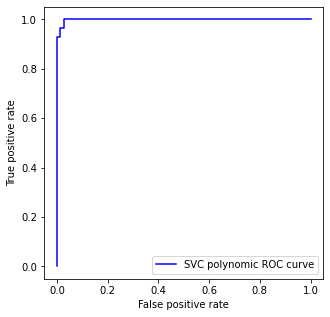

SVC polynomic area under the ROC curve is 0.9985119047619048


In [70]:
print("------- SVC polynomic -------")
svcPolynomic = SVC(kernel='poly', C=0.1, max_iter=500, probability=True)
svcPolynomic.fit(X_training_set, Y_training_set)
Y_SVCPolynomic_predicted_set = svcPolynomic.predict(X_testing_set)
svcPolynomicMeanSquareError = meanSquareErrorFunction(Y_SVCPolynomic_predicted_set, Y_testing_set)
print("SVC polynomic mean square error = ", svcPolynomicMeanSquareError)

# SVC polynomic Accuracy score.
svcPolynomicAccuracyScore = accuracy_score(pd.DataFrame(Y_SVCPolynomic_predicted_set), Y_testing_set)
print("SVC polynomic Accuracy score:")
print(svcPolynomicAccuracyScore)

svcPolynomicPrecisionScore = precision_score(pd.DataFrame(Y_SVCPolynomic_predicted_set), Y_testing_set)
print("SVC polynomic Precision score:")
print(svcPolynomicPrecisionScore)

# SVC polynomic confusion matrix.
print("SVC polynomic confusion matrix:")
print(confusion_matrix(Y_testing_set, Y_SVCPolynomic_predicted_set))

# SVC polynomic ROC curve compute.
Y_SVCPolinomic_predicted_set_prob = svcPolynomic.predict_proba(X_testing_set)[:, 1]
X_SVCPolynomic_rate, Y_SVCPolynomic_rate, _ = roc_curve(Y_testing_set,
                                                        Y_SVCPolinomic_predicted_set_prob)
fig = plt.figure(figsize=(5., 5.))
ax = fig.add_subplot(1, 1, 1)
plt.plot(X_SVCPolynomic_rate, Y_SVCPolynomic_rate, color="blue", linestyle="-",
         label="SVC polynomic ROC curve")
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='best', ncol=2)
plt.show()

# SVC polynomic area under the ROC curve.
print("SVC polynomic area under the ROC curve is",
      roc_auc_score(Y_testing_set, Y_SVCPolinomic_predicted_set_prob))
# ------------------------------------------------------------------------------------------------------

----------------------------- Decision Tree Classification -----------------------------
Decision Tree Classifier (DTC) with entropy criterion mean square error =  [0.]
DTC Binary tree Accuracy score:
0.98
DTC Binary tree Precision score:
1.0
DTC Binary tree confusion matrix: 
[[70  2]
 [ 0 28]]


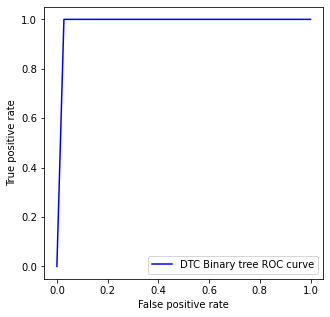

DTC Binary tree area under the ROC curve is 0.986111111111111


In [71]:
# ---------------------------------- Decision Tree Classification ----------------------------------
print("----------------------------- Decision Tree Classification -----------------------------")
# Decision tree classification procedure using the entropy function.
decisionTreeClassifier = DecisionTreeClassifier(criterion='entropy')
decisionTreeClassifier.fit(X_training_set, Y_training_set)
Y_Decision_Tree_Classifier_predicted_set = decisionTreeClassifier.predict(X_testing_set)
DecisionTreeClassifierMeanSquareError = meanSquareErrorFunction(Y_Decision_Tree_Classifier_predicted_set, Y_testing_set)
print("Decision Tree Classifier (DTC) with entropy criterion mean square error = ",
      DecisionTreeClassifierMeanSquareError)

# Decision tree classification Accuracy score.
decisionTreeClassifierAccuracyScore = accuracy_score(pd.DataFrame(Y_Decision_Tree_Classifier_predicted_set),
                                                     Y_testing_set)
print("DTC Binary tree Accuracy score:")
print(decisionTreeClassifierAccuracyScore)

decisionTreeClassifierPrecisionScore = precision_score(pd.DataFrame(Y_Decision_Tree_Classifier_predicted_set),
                                                       Y_testing_set)
print("DTC Binary tree Precision score:")
print(decisionTreeClassifierPrecisionScore)

# Decision tree classifier confusion matrix.
print("DTC Binary tree confusion matrix: ")
print(confusion_matrix(Y_testing_set, Y_Decision_Tree_Classifier_predicted_set))

# Decision tree classifier ROC curve compute.
Y_DecisionTreeClassifier_predicted_set_prob = decisionTreeClassifier.predict_proba(X_testing_set)[:, 1]
X_DecisionTreeClassifier_rate, Y_DecisionTreeClassifier_rate, _ = roc_curve(Y_testing_set,
                                                                            Y_DecisionTreeClassifier_predicted_set_prob)
fig = plt.figure(figsize=(5., 5.))
ax = fig.add_subplot(1, 1, 1)
plt.plot(X_DecisionTreeClassifier_rate, Y_DecisionTreeClassifier_rate, color="blue", linestyle="-",
         label="DTC Binary tree ROC curve")
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='best', ncol=2)
plt.show()

# Decision tree classifier area under the ROC curve.
print("DTC Binary tree area under the ROC curve is",
      roc_auc_score(Y_testing_set, Y_DecisionTreeClassifier_predicted_set_prob))
# ------------------------------------------------------------------------------------------------------

In [72]:
# ---------------------------------- Binary trees with simplified bagging (BTSB) ----------------------------------
print("----------------------------- Binary trees with simplified bagging (BTSB) -----------------------------")
# Number of points.
points_number = 200

# Bagging definition.
n_estimators = 10
bag = np.empty((n_estimators), dtype=object)  # Empty array.

# Bootstraping (note that sampling is made on the training data)
for i in range(n_estimators):
    randomIndex = np.random.choice(range(0, len(X_training_set)), size=int(len(X_training_set)),
                                   replace=True)  # Array with random values got from X_training_set array with range(0,len(X_training_set)).
    np.unique(randomIndex)  # Function unique returns non repeated values ordered.
    X_bootstrap_training_set = X_training_set[
        np.unique(randomIndex)]  # Rows (vectors) are selected from X_training_set given by randomIndex.
    Y_bootstrap_training_set = Y_training_set[
        np.unique(
            randomIndex)]  # Rows (vectors) are selected from Y_training_set given by randomIndex.
    bag[i] = DecisionTreeRegressor(random_state=1)
    bag[i].fit(X_bootstrap_training_set, Y_bootstrap_training_set)

# Bagging prediction (given each sample adjustment the forecast is made on the data testing set).
Y_BTSB_predicted_set = np.zeros(len(Y_testing_set))
# Y_BTSB_predicted_set_prob = np.zeros(len(Y_testing_set))
for i in range(n_estimators):
    Y_BTSB_predicted_set = Y_BTSB_predicted_set + bag[i].predict(X_testing_set)
    # Y_BTSB_predicted_set_prob = Y_BTSB_predicted_set_prob + bag[i]._._predict_proba(X_testing_set)[:, 1]
Y_BTSB_predicted_set = Y_BTSB_predicted_set / n_estimators
BTSBMeanSquareError = meanSquareErrorFunction(Y_BTSB_predicted_set, Y_testing_set)
print("Binary trees with simplified bagging (BTSB) mean square error = ", BTSBMeanSquareError)

# Binary trees with simplified bagging (BTSB) Accuracy score.
# BTSBAccuracyScore = accuracy_score(pd.DataFrame(Y_BTSB_predicted_set),
#                                    Y_testing_set)
# print("Binary trees with simplified bagging (BTSB) Accuracy score:")
# print(BTSBAccuracyScore)

# Binary trees with simplified bagging (BTSB) confusion matrix.
# print("Binary trees with simplified bagging (BTSB) confusion matrix: ")
# print(confusion_matrix(Y_testing_set, Y_BTSB_predicted_set))

# Binary trees with simplified bagging (BTSB) ROC curve compute.
# X_BTSB_rate, Y_BTSB_rate, _ = roc_curve(Y_testing_set, Y_BTSB_predicted_set_prob)
# fig = plt.figure(figsize=(5., 5.))
# ax = fig.add_subplot(1, 1, 1)
# plt.plot(X_BTSB_rate, Y_BTSB_rate, color="blue", linestyle="-",
#          label="Binary trees with simplified bagging (BTSB) ROC curve")
# plt.xlabel('False positive rate')
# plt.ylabel('True positive rate')
# plt.legend(loc='best', ncol=2)
# plt.show()

# Decision tree classifier area under the ROC curve.
# print("Binary trees with simplified bagging (BTSB) area under the ROC curve is",
#       roc_auc_score(Y_testing_set, Y_BTSB_predicted_set_prob))
# ------------------------------------------------------------------------------------------------------

----------------------------- Binary trees with simplified bagging (BTSB) -----------------------------
Binary trees with simplified bagging (BTSB) mean square error =  [0.]


In [73]:
# ---------------------------------- Random Forest ----------------------------------
print("----------------------------- Random Forest -----------------------------")
# Random Forest.
randomForestRegressor = RandomForestRegressor(n_estimators=10, max_features=1, random_state=1)
randomForestRegressor.fit(X_training_set, Y_training_set)
Y_Random_Forest_predicted_set = randomForestRegressor.predict(X_testing_set)
randomForestMeanSquareError = meanSquareErrorFunction(Y_Random_Forest_predicted_set, Y_testing_set)
print("Random forest mean square error = ",
      randomForestMeanSquareError)

# Random forest Accuracy score.
# randomForestAccuracyScore = accuracy_score(pd.DataFrame(Y_Random_Forest_predicted_set),
#                                            Y_testing_set)
# print("Random forest Accuracy score:")
# print(randomForestAccuracyScore)

# Random forest confusion matrix.
# print("Random forest confusion matrix: ")
# print(confusion_matrix(Y_testing_set, Y_Random_Forest_predicted_set))

# Random forest ROC curve compute.
# Y_RandomForest_predicted_set_prob = randomForestRegressor.predict_proba(X_testing_set)[:, 1]
# X_RandomForest_rate, Y_RandomForest_rate, _ = roc_curve(Y_testing_set,
#                                                         Y_RandomForest_predicted_set_prob)
# fig = plt.figure(figsize=(5., 5.))
# ax = fig.add_subplot(1, 1, 1)
# plt.plot(X_RandomForest_rate, Y_RandomForest_rate, color="blue", linestyle="-",
#          label="Random forest ROC curve")
# plt.xlabel('False positive rate')
# plt.ylabel('True positive rate')
# plt.legend(loc='best', ncol=2)
# plt.show()

# Random forest area under the ROC curve.
# print("Random forest area under the ROC curve is",
#       roc_auc_score(Y_testing_set, Y_RandomForest_predicted_set_prob))
# ------------------------------------------------------------------------------------------------------

----------------------------- Random Forest -----------------------------
Random forest mean square error =  [0.]


----------------------------- Neural network -----------------------------
Neural Network with tanh activation function mean square error =  [0.]
Neural network Accuracy score:
1.0
Neural network Precision score:
1.0
Neural network confusion matrix: 
[[72  0]
 [ 0 28]]


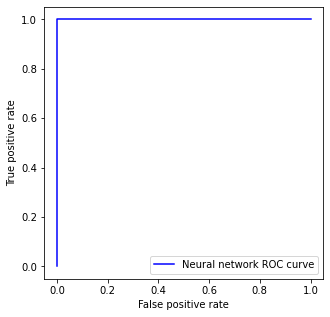

Neural network area under the ROC curve is 1.0


In [74]:
# ---------------------------------- Neural network ----------------------------------
print("----------------------------- Neural network -----------------------------")
# Neural network with "tanh" activation function.
neuralNetworkModelTanh = MLPClassifier(activation='tanh', alpha=0.001, solver='lbfgs',
                                       hidden_layer_sizes=(4, 1), max_iter=10000)
neuralNetworkModelTanh.fit(X_training_set, Y_training_set)
Y_Neural_Network_predicted_set = neuralNetworkModelTanh.predict(X_testing_set)
neuralNetworkMeanSquareError = meanSquareErrorFunction(Y_Neural_Network_predicted_set, Y_testing_set)
print("Neural Network with tanh activation function mean square error = ",
      neuralNetworkMeanSquareError)

# Neural network Accuracy score.
neuralNetworkAccuracyScore = accuracy_score(pd.DataFrame(Y_Neural_Network_predicted_set),
                                            Y_testing_set)
print("Neural network Accuracy score:")
print(neuralNetworkAccuracyScore)

# Neural network Precision score.
neuralNetworkPrecisionScore = precision_score(pd.DataFrame(Y_Neural_Network_predicted_set),
                                              Y_testing_set)
print("Neural network Precision score:")
print(neuralNetworkPrecisionScore)

# Neural network confusion matrix.
print("Neural network confusion matrix: ")
print(confusion_matrix(Y_testing_set, Y_Neural_Network_predicted_set))

# Neural network ROC curve compute.
Y_NeuralNetwork_predicted_set_prob = neuralNetworkModelTanh.predict_proba(X_testing_set)[:, 1]
X_NeuralNetwork_rate, Y_NeuralNetwork_rate, _ = roc_curve(Y_testing_set,
                                                          Y_NeuralNetwork_predicted_set_prob)
fig = plt.figure(figsize=(5., 5.))
ax = fig.add_subplot(1, 1, 1)
plt.plot(X_NeuralNetwork_rate, Y_NeuralNetwork_rate, color="blue", linestyle="-",
         label="Neural network ROC curve")
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='best', ncol=2)
plt.show()

# Neural network area under the ROC curve.
print("Neural network area under the ROC curve is",
      roc_auc_score(Y_testing_set, Y_NeuralNetwork_predicted_set_prob))
# ------------------------------------------------------------------------------------------------------

In [75]:
# Conclusion.
# Although it was not possible to perform the requested metrics on the algorithms: "Random forest" and "Binary trees
# with simplified bagging", in order to determine their performance, it is observed that
# the "Neural Networks" algorithm outperforms in all performance metrics.